In [1]:
import scanpy as sc
from pathlib import Path
import numpy as np
import pandas as pd
import anndata as ad
import matplotlib.pyplot as plt
import seaborn as sns
import gseapy as gp
import decoupler

import os
import sys
import logging
import warnings
from deg import *

/ocean/projects/cis240075p/asachan/.conda/envs/decoupler/lib/python3.12/site-packages/scanpy/_utils/__init__.py:27: FutureWarning: `__version__` is deprecated, use `importlib.metadata.version('anndata')` instead.
  from anndata import __version__ as anndata_version
/ocean/projects/cis240075p/asachan/.conda/envs/decoupler/lib/python3.12/site-packages/scanpy/__init__.py:36: FutureWarning: `__version__` is deprecated, use `importlib.metadata.version('anndata')` instead.
  if Version(anndata.__version__) >= Version("0.11.0rc2"):
/ocean/projects/cis240075p/asachan/.conda/envs/decoupler/lib/python3.12/site-packages/scanpy/readwrite.py:15: FutureWarning: `__version__` is deprecated, use `importlib.metadata.version('anndata')` instead.
  if Version(anndata.__version__) >= Version("0.11.0rc2"):


In [2]:
adata_female_file = '/ocean/projects/cis240075p/asachan/datasets/TA_muscle/ERCC1_KO_mice/integrated_samples/female_98_80.h5ad'
adata_male_file = '/ocean/projects/cis240075p/asachan/datasets/TA_muscle/ERCC1_KO_mice/integrated_samples/male_98_85.h5ad'
#adata_with_features_file = 
adata_female = sc.read_h5ad(adata_female_file)
adata_male = sc.read_h5ad(adata_male_file)

In [3]:
# subset to skeletal muscle stem cells
adata_musc_f = adata_female[adata_female.obs['C_scANVI'] == 'Skeleton MuSc']
adata_musc_m = adata_male[adata_male.obs['C_scANVI'] == 'Skeleton MuSc']

## Geneset (atrophy/senescence) scores

In [4]:
custom_atrophy_pathway = ["UBB","UBC","FBXO32","TRIM63","MDM2","FBXO30","CAMK2B","TIE1","PSMA1","PSMA2","PSMA3","PSMA4","PSMA5","PSMA6","PSMA7","PSMB1","PSMB2","PSMB3","PSMB4","FBXO21","FBXO31","NEDD4","UBE2B","UBE2G1","UBE2J1","CTSL","CTSV","BNIP3","DEPP1","GABARAPL1","MAP1LC3","RETREG1","SQSTM1","CAPN1","CAPN2","ATF4","FOXO1","FOXO3A","HDAC9","RUNX1","AMPD3","CHRNA1","CDKN1A"]
# Convert to mouse gene format
custom_atrophy_pathway_mouse = [gene.capitalize() for gene in custom_atrophy_pathway]
print(custom_atrophy_pathway_mouse)

['Ubb', 'Ubc', 'Fbxo32', 'Trim63', 'Mdm2', 'Fbxo30', 'Camk2b', 'Tie1', 'Psma1', 'Psma2', 'Psma3', 'Psma4', 'Psma5', 'Psma6', 'Psma7', 'Psmb1', 'Psmb2', 'Psmb3', 'Psmb4', 'Fbxo21', 'Fbxo31', 'Nedd4', 'Ube2b', 'Ube2g1', 'Ube2j1', 'Ctsl', 'Ctsv', 'Bnip3', 'Depp1', 'Gabarapl1', 'Map1lc3', 'Retreg1', 'Sqstm1', 'Capn1', 'Capn2', 'Atf4', 'Foxo1', 'Foxo3a', 'Hdac9', 'Runx1', 'Ampd3', 'Chrna1', 'Cdkn1a']


In [5]:
geneset_df = pd.DataFrame({'source': "Atrophy Pathway (PMID: 31325479)", 'target': custom_atrophy_pathway_mouse})
geneset_df

,source,target
0,Atrophy Pathway (PMID: 31325479),Ubb
1,Atrophy Pathway (PMID: 31325479),Ubc
2,Atrophy Pathway (PMID: 31325479),Fbxo32
3,Atrophy Pathway (PMID: 31325479),Trim63
4,Atrophy Pathway (PMID: 31325479),Mdm2
5,Atrophy Pathway (PMID: 31325479),Fbxo30
6,Atrophy Pathway (PMID: 31325479),Camk2b
7,Atrophy Pathway (PMID: 31325479),Tie1
8,Atrophy Pathway (PMID: 31325479),Psma1
9,Atrophy Pathway (PMID: 31325479),Psma2


In [32]:
%%time
decoupler.mt.aucell(
    adata_musc_m,
    geneset_df,
    verbose = True,
    raw=False,
)

2025-11-03 00:35:18 | [INFO] aucell - Running aucell
2025-11-03 00:35:18 | [INFO] Extracted omics mat with 357 rows (observations) and 1188 columns (features)
2025-11-03 00:35:18 | [WARNING] weight not found in net.columns, adding it as:
net['weight'] = 1
2025-11-03 00:35:18 | [INFO] Network has 7 unique features and 1 unique sources
2025-11-03 00:35:18 | [INFO] aucell - calculating 1 AUCs for 1188 targets across 357 observations, categorizing features at rank=60


  0%|          | 0/357 [00:00<?, ?it/s]

2025-11-03 00:35:18 | [INFO] aucell - done


CPU times: user 358 ms, sys: 724 ms, total: 1.08 s
Wall time: 188 ms


/ocean/projects/cis240075p/asachan/.conda/envs/decoupler/lib/python3.12/site-packages/decoupler/mt/_run.py:33: ImplicitModificationWarning: Setting element `.obsm['score_aucell']` of view, initializing view as actual.
  data.obsm[f'score_{name}'] = es


In [33]:
adata_musc_m

AnnData object with n_obs × n_vars = 357 × 1188
    obs: 'sample_id', 'cell_type', 'condition', 'background_fraction', 'cell_probability', 'cell_size', 'droplet_efficiency', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'total_counts_mt_cb', 'log1p_total_counts_mt_cb', 'pct_counts_mt_cb', 'total_counts_ribo_cb', 'log1p_total_counts_ribo_cb', 'pct_counts_ribo_cb', 'total_counts_hb_cb', 'log1p_total_counts_hb_cb', 'pct_counts_hb_cb', 'n_genes', 'sex', 'batch', '_scvi_batch', '_scvi_labels', 'C_scANVI'
    var: 'hb', 'ribo', 'mt', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'highly_variable_nbatches', 'n_cells'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'batch_colors', 'cell_type_colors', 'cond

In [34]:
adata_musc_m.obs["Atrophy Pathway"] = adata_musc_m.obsm["score_aucell"]["Atrophy Pathway (PMID: 31325479)"]

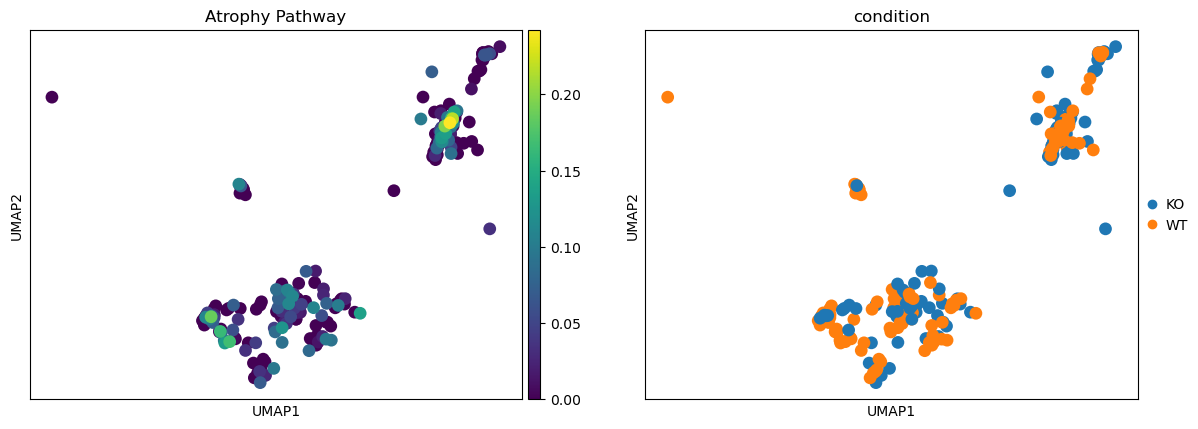

In [35]:
sc.pl.umap(adata_musc_m, color=["Atrophy Pathway", 'condition'])

In [36]:
# Use cell-level data directly from adata.obs
cell_level_scores_df = adata_musc_m.obs[['sample_id', 'condition', 'C_scANVI', 'Atrophy Pathway']].copy()
geneset_sizes_data = {
    'Atrophy Pathway': 43
}
geneset_sizes_series = pd.Series(geneset_sizes_data)
# Your list of score columns
score_cols_to_plot = list(geneset_sizes_series.index)

In [37]:
display(cell_level_scores_df)
display(score_cols_to_plot)

,sample_id,condition,C_scANVI,Atrophy Pathway
AAACCCATCCATAGGT-1,M4_KO,KO,Skeleton MuSc,0.000000
AAAGGATGTTCTCCTG-1,M4_KO,KO,Skeleton MuSc,0.096939
AAAGGGCAGTCATTGC-1,M4_KO,KO,Skeleton MuSc,0.017857
AACTTCTTCGCAGATT-1,M4_KO,KO,Skeleton MuSc,0.022959
AAGAACATCGGACCAC-1,M4_KO,KO,Skeleton MuSc,0.000000
...,...,...,...,...
TCTCGATTCGTTGCCC-1,M6_WT,WT,Skeleton MuSc,0.000000
TCTCTCCTCACTCATC-1,M6_WT,WT,Skeleton MuSc,0.030612
TGGACGTTCGCGATTA-1,M6_WT,WT,Skeleton MuSc,0.000000
TGGTCAATCTATCCGT-1,M6_WT,WT,Skeleton MuSc,0.000000


['Atrophy Pathway']

In [38]:
def plot_pathway_box_distributions_by_age(
    df_cell_level,
    score_cols,
    geneset_sizes,
    age_col='age',
    sample_col='sample',
    annotation_col='Annotation',
    target_annotation=None,
    filter_quantile_to_keep_top=None,
    n_subplot_cols=2,
    figsize_per_subplot=(8, 6),
    box_width=0.8,
    sample_label_fontsize=8,
    sample_label_y_offset_factor=0.05,
    title_text=None  # Main figure title
):
    """
    Plots box plots for multiple pathway scores, with samples positioned by age on x-axis.
    Sample IDs are annotated above the boxes.
    Optionally filters cells to keep only the most active ones per sample per pathway.
    """
    plot_df = df_cell_level.copy()

    if target_annotation is not None:
        if annotation_col not in plot_df.columns:
            print(f"Warning: Annotation column '{annotation_col}' not found. Cannot filter by '{target_annotation}'.")
            return
        plot_df = plot_df[plot_df[annotation_col] == target_annotation]
        if plot_df.empty:
            print(f"No cells found for annotation '{target_annotation}'.")
            return

    required_cols = [age_col, sample_col] + score_cols
    for col in required_cols:
        if col not in plot_df.columns:
            print(f"Warning: Required column '{col}' not found. Aborting.")
            return

    plot_df = plot_df.dropna(subset=[age_col, sample_col], how='any')
    plot_df = plot_df.dropna(subset=score_cols, how='all')

    if plot_df.empty:
        print("No data to plot after initial NaN filtering.")
        return

    unique_ages_sorted = sorted(plot_df[age_col].unique())
    age_to_xpos = {age: i for i, age in enumerate(unique_ages_sorted)}
    plot_df['x_position'] = plot_df[age_col].map(age_to_xpos)

    xpos_to_samples = plot_df.groupby('x_position')[sample_col].unique().apply(lambda x: '/'.join(sorted(x)))

    num_scores = len(score_cols)
    n_subplot_rows = (num_scores + n_subplot_cols - 1) // n_subplot_cols

    fig, axes = plt.subplots(
        n_subplot_rows,
        n_subplot_cols,
        figsize=(figsize_per_subplot[0] * n_subplot_cols, figsize_per_subplot[1] * n_subplot_rows),
        squeeze=False
    )
    axes = axes.flatten()

    for i, score in enumerate(score_cols):
        ax = axes[i]
        current_score_df = plot_df[['x_position', sample_col, age_col, score]].copy().dropna(subset=[score])

        if current_score_df.empty:
            ax.set_title(f"{score.replace('_', ' ')}\n(No data)")
            ax.axis('off')
            continue

        df_for_plot = current_score_df.copy()

        if filter_quantile_to_keep_top is not None and 0 < filter_quantile_to_keep_top < 1:
            quantile_for_threshold = 1.0 - filter_quantile_to_keep_top
            def filter_by_quantile(group):
                if group.empty or len(group) < 2:
                    return group
                original_sample_group = plot_df[
                    (plot_df[sample_col] == group[sample_col].iloc[0]) &
                    (plot_df[age_col] == group[age_col].iloc[0])
                ][score]
                if original_sample_group.empty or len(original_sample_group) < 2:
                    return group
                threshold_val = original_sample_group.quantile(quantile_for_threshold)
                return group[group[score] >= threshold_val]
            df_for_plot = df_for_plot.groupby([sample_col, age_col], group_keys=False).apply(filter_by_quantile)

            if df_for_plot.empty:
                ax.set_title(f"{score.replace('_', ' ')}\n(No data after filtering)")
                ax.axis('off')
                continue
        
        # Boxplot
        sns.boxplot(x='x_position', y=score, data=df_for_plot, ax=ax, palette="tab10", width=box_width, fliersize=2)

        ax.set_xticks(list(age_to_xpos.values()))
        ax.set_xticklabels([str(age) for age in unique_ages_sorted], rotation=45, ha="right")
        ax.set_xlabel('Age')

        # Build subplot title (NOT the main figure title)
        subplot_title = score.replace('_', ' ')  # Changed variable name here
        size = geneset_sizes.get(score)
        if size is not None:
            subplot_title += f"\n(n={int(size)})"
        if filter_quantile_to_keep_top is not None:
            subplot_title += f"\n(Top {filter_quantile_to_keep_top*100:.0f}% cells per sample)"

        ax.set_title(subplot_title)  # Use subplot_title for individual plots
        ax.set_ylabel('Score Distribution')
        ax.grid(True, alpha=0.3, axis='y')

    for j in range(num_scores, len(axes)):
        axes[j].axis('off')

    # Use the passed title_text parameter for the main figure title
    if title_text is None:
        fig_title = 'Pathway Score Distributions by Age'
        if target_annotation:
            fig_title += f' (Annotation: {target_annotation})'
    else:
        fig_title = title_text  # Use the custom title passed in
    
    plt.suptitle(fig_title, fontsize=16, y=1.02 if n_subplot_rows > 1 else 1.05)

    plt.tight_layout(rect=[0, 0, 1, 0.98 if n_subplot_rows > 1 else 0.95])
    plt.show()

/tmp/ipykernel_102671/2817451171.py:50: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  xpos_to_samples = plot_df.groupby('x_position')[sample_col].unique().apply(lambda x: '/'.join(sorted(x)))
2025-11-03 00:36:17 | [INFO] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
/tmp/ipykernel_102671/2817451171.py:95: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='x_position', y=score, data=df_for_plot, ax=ax, palette="tab10", width=box_width, fliersize=2)
2025-11-03 00:36:17 | [INFO] Using categorical units to plot a 

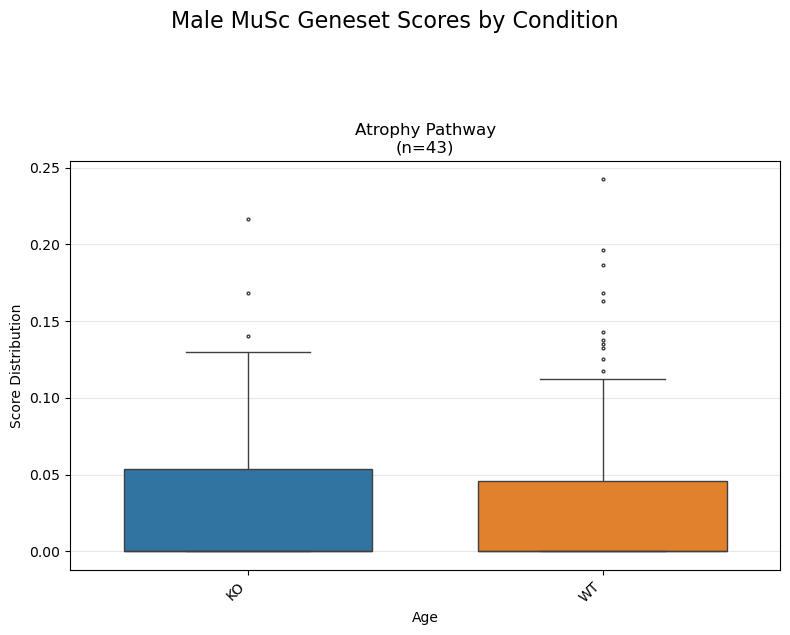

In [39]:
plot_pathway_box_distributions_by_age( # Note the new function name
    df_cell_level=cell_level_scores_df,
    score_cols=score_cols_to_plot,
    geneset_sizes=geneset_sizes_series,
    age_col='condition',
    sample_col='sample_id',
    annotation_col='C_scANVI',
    target_annotation=None,  
    filter_quantile_to_keep_top=None,
    n_subplot_cols=1,
    box_width=0.7,
    sample_label_y_offset_factor=0.08,
    title_text='Male MuSc Geneset Scores by Condition'
)